In [36]:
import pandas as pd
import os

# accessing the grandparent folder 
path = os.getcwd()
parent = os.path.dirname(os.path.dirname(path))
# data directory
data_dir_physics = os.path.join(parent, "Data Directory", "physics_and_chemistry_nobel_laureate.csv")


df = pd.read_csv(data_dir_physics)

In [37]:
df.head()

,year,name,country,category,biography,clean_biography
0,1901,Wilhelm Röntgen,German Empire,Physics,Wilhelm Conrad Röntgen (; German pronunciation...,Wilhelm Conrad Röntgen german pronunciation ˈv...
1,1902,Hendrik Lorentz,Netherlands,Physics,Hendrik Antoon Lorentz (; 18 July 1853 – 4 Feb...,Hendrik Antoon Lorentz July February dutch phy...
2,1902,Pieter Zeeman,Netherlands,Physics,Pieter Zeeman (Dutch: [ˈzeːmɑn]; 25 May 1865 –...,Pieter Zeeman Dutch ˈzeːmɑn October dutch phys...
3,1903,Henri Becquerel,France,Physics,Antoine Henri Becquerel (; French pronunciatio...,Antoine Henri Becquerel french pronunciation b...
4,1903,Pierre Curie,France,Physics,"Pierre Curie ( KURE-ee, French: [pjɛʁ kyʁi]; 1...",Pierre Curie KURE ee French pjɛʁ kyʁi April fr...


In [38]:
df.drop(["year", "name", "country"], axis=1, inplace=True)

## Number of Sentences statistics 

In [39]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [40]:
def n_sentences(row):
  # the length of the list of sentences will give the number of sentences
  doc = nlp(row)
  sents = [sent for sent in doc.sents]
  length_bio = len(sents)
  return length_bio


In [41]:
df["n_sentences"] = df["biography"].apply(n_sentences)

In [42]:
df["n_sentences"]

0       82
1      157
2       56
3       83
4       79
      ... 
195     43
196     92
197     28
198     23
199     37
Name: n_sentences, Length: 200, dtype: int64

### Total number of sentences per category

In [43]:
# Total number of sentences per category
sum_lengths = df.groupby("category").sum("n_sentences")
sum_lengths

,n_sentences
category,
Chemistry,7612
Physics,13405


### Average number of sentences per category

In [44]:
# Average number of sentences per category
mean_len = df.groupby("category").mean("n_sentences")
mean_len

,n_sentences
category,
Chemistry,76.12
Physics,134.05


### Max number of sentences per category

In [45]:
# Max number of sentences per category
max_len = df.groupby("category").max("n_sentences")
max_len

,n_sentences
category,
Chemistry,485
Physics,772


In [46]:
df[(df["category"] == "Chemistry") & (df["n_sentences"] == 485)][["category", "biography"]]

,category,biography
139,Chemistry,Otto Hahn (pronounced [ˈɔtoː ˈhaːn] ; 8 March ...


In [47]:
df[(df["category"] == "Physics") & (df["n_sentences"] == 772)][["category", "biography"]]

,category,biography
82,Physics,"Richard Phillips Feynman (; May 11, 1918 – Feb..."


### Min number of sentences per category

In [48]:
# Min number of sentences per category
min_len = df.groupby("category").min("n_sentences")
min_len

,n_sentences
category,
Chemistry,16
Physics,23


In [49]:
df[(df["category"] == "Chemistry") & (df["n_sentences"] == 16)][["category", "biography"]]

,category,biography
145,Chemistry,Arne Wilhelm Kaurin Tiselius (10 August 1902 –...


In [50]:
df[(df["category"] == "Physics") & (df["n_sentences"] == 23)][["category", "biography"]]

,category,biography
89,Physics,Louis Eugène Félix Néel (22 November 1904 – 1...


### Visualizations

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

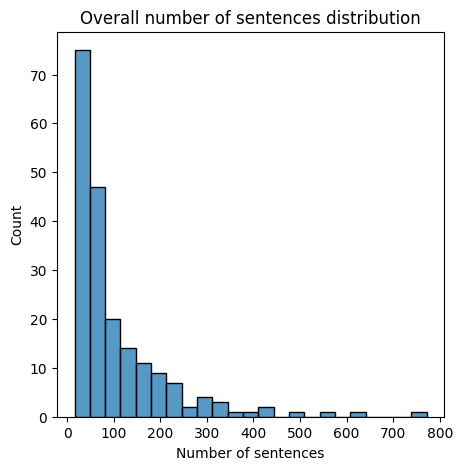

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.histplot(df["n_sentences"])
plt.title("Overall number of sentences distribution")
plt.xlabel("Number of sentences")
plt.show()

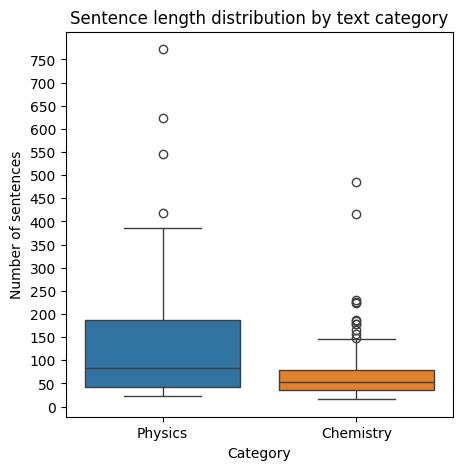

In [53]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_yticks(np.arange(0, 800, 50))
sns.boxplot(data = df, y = "n_sentences", x = "category", hue="category")

plt.title("Sentence length distribution by text category")
plt.ylabel("Number of sentences")
plt.xlabel("Category")

plt.show()


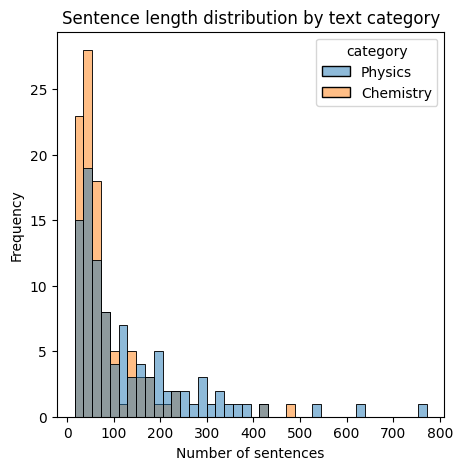

In [54]:
fig, ax = plt.subplots(figsize=(5,5))

# ax.set_xticks(np.arange(0, 800, 50))
sns.histplot(data = df, x="n_sentences", hue="category", bins=40)

plt.title("Sentence length distribution by text category")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")

plt.show()

## Bigrams

### Counting ngrams

In [55]:
from nltk.util import bigrams
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alber\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
def get_list_texts(df, category):

    df = df[df['category'] == category]
    #concatenate all into one string
    list_texts = df['biography'].tolist()
    single_string = " ".join(list_texts)
    nlp.max_length = 1846823 # spaCy safeguards the max length but we can bypass that limit safely in this case
    doc = nlp(single_string)
    # getting the sentences
    list_sentences = [sent for sent in doc.sents]
    return list_sentences

In [57]:
list_text_physics = get_list_texts(df, "Physics")
list_text_chemistry = get_list_texts(df, "Chemistry")

In [58]:
# list of lists where each list represents a sentence and contains the tokens of the sentence

tokens_sentences_physics = []
for sentence in list_text_physics:
    sentence_tokens = [token.text for token in sentence]
    tokens_sentences_physics.append(sentence_tokens)
    
tokens_sentences_chem = []
for sentence in list_text_chemistry:
    sentence_tokens = [token.text for token in sentence]
    tokens_sentences_chem.append(sentence_tokens)

In [59]:
# the bigrams method from NLTK will give a generator so if we put it in a list, we will get a list of tuples
# the length of that list will be the amount of bigrams in each sentence
sentences_bigrams_physics = [len(list(bigrams(tokens_sent))) for tokens_sent in tokens_sentences_physics]
sentences_bigrams_chem = [len(list(bigrams(tokens_sent))) for tokens_sent in tokens_sentences_chem]

In [60]:
print("Total number of bigrams in the Physics category" , np.sum(sentences_bigrams_physics))
print("Mean number of bigrams per sentence in the Physics category", np.mean(sentences_bigrams_physics))
print("Max. number of bigrams in a sentence in the Physics category", np.max(sentences_bigrams_physics))
print("Min. number of bigrams in a sentence in the Physics category", np.min(sentences_bigrams_physics))

Total number of bigrams in the Physics category 305923
Mean number of bigrams per sentence in the Physics category 22.936197330934174
Max. number of bigrams in a sentence in the Physics category 358
Min. number of bigrams in a sentence in the Physics category 0


In [61]:
print("Total number of bigrams in the Chemistry category", np.sum(sentences_bigrams_chem))
print("Mean number of bigrams per sentence in the Chemistry category", np.mean(sentences_bigrams_chem))
print("Max. number of bigrams in a sentence in the Chemistry category", np.max(sentences_bigrams_chem))
print("Min. number of bigrams in a sentence in the Chemistry category", np.min(sentences_bigrams_chem))

Total number of bigrams in the Chemistry category 176678
Mean number of bigrams per sentence in the Chemistry category 23.444532908704883
Max. number of bigrams in a sentence in the Chemistry category 343
Min. number of bigrams in a sentence in the Chemistry category 0


#### Visualizing the distribution of number of bigrams per sentence

In [62]:
df_ph = pd.DataFrame(sentences_bigrams_physics)
df_ch = pd.DataFrame(sentences_bigrams_chem)

In [63]:
df_ph["cat"] = "Physics"
df_ch["cat"] = "Chemestry"

In [64]:
df_dist_bigrams = pd.concat([df_ch, df_ph])
df_dist_bigrams.columns = ["values", "cat"]

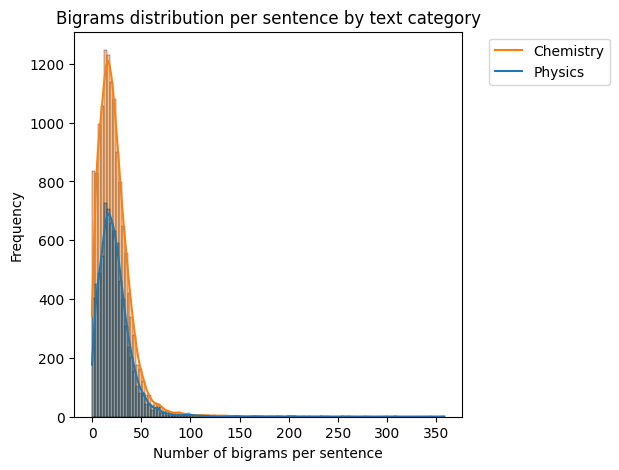

In [65]:
fig, ax = plt.subplots(figsize=(5,5))

# ax.set_xticks(np.arange(0, 800, 50))

sns.histplot(df_dist_bigrams, x="values", hue="cat", binwidth=3, kde=True)

plt.title("Bigrams distribution per sentence by text category")
plt.xlabel("Number of bigrams per sentence")
plt.ylabel("Frequency")
plt.legend(["Chemistry", "Physics"], bbox_to_anchor=(1.4, 1))


plt.show()

### Information Retrieval with bigrams

In [66]:
# modified fuction to get clean tokens

def get_texts(df, category):

    df = df[df['category'] == category]
    #concatenate all into one string
    all_texts = ' '.join(df['biography'].tolist())
    nlp.max_length = 1646823 # bypassing the safeguard
    doc = nlp(all_texts)
    #filtering stopwords and punctuation
    filtered_text = [token.text for token in doc if not token.is_stop and token.is_alpha]

    return filtered_text

In [67]:
df

,category,biography,clean_biography,n_sentences
0,Physics,Wilhelm Conrad Röntgen (; German pronunciation...,Wilhelm Conrad Röntgen german pronunciation ˈv...,82
1,Physics,Hendrik Antoon Lorentz (; 18 July 1853 – 4 Feb...,Hendrik Antoon Lorentz July February dutch phy...,157
2,Physics,Pieter Zeeman (Dutch: [ˈzeːmɑn]; 25 May 1865 –...,Pieter Zeeman Dutch ˈzeːmɑn October dutch phys...,56
3,Physics,Antoine Henri Becquerel (; French pronunciatio...,Antoine Henri Becquerel french pronunciation b...,83
4,Physics,"Pierre Curie ( KURE-ee, French: [pjɛʁ kyʁi]; 1...",Pierre Curie KURE ee French pjɛʁ kyʁi April fr...,79
...,...,...,...,...
195,Chemistry,Sir Aaron Klug (11 August 1926 – 20 November ...,Sir Aaron Klug August November british biophys...,43
196,Chemistry,"Henry Taube, (November 30, 1915 – November 16...",Henry Taube November November Canadian bear am...,92
197,Chemistry,"Robert Bruce Merrifield (July 15, 1921 – May 1...",Robert Bruce Merrifield July american biochemi...,28
198,Chemistry,"Herbert Aaron Hauptman (February 14, 1917 – Oc...",Herbert Aaron Hauptman February October americ...,23


In [68]:
text_physics = get_texts(df, "Physics")
text_chemistry = get_texts(df, "Chemistry")

#### Chemistry bigrams

In [69]:
bi_chems = list(bigrams(text_chemistry))

In [70]:
len(text_chemistry)

78537

In [71]:
len(bi_chems)

78536

In [72]:
chem_counts = [(item, bi_chems.count(item)) for item in sorted(set(bi_chems))]

In [73]:
chem_counts.sort(key=lambda x: x[1], reverse=True)

In [74]:
# top 50 bigrams for the chemistry category
chem_counts[:50]

[(('Nobel', 'Prize'), 332),
 (('Prize', 'Chemistry'), 207),
 (('Academy', 'Sciences'), 127),
 (('World', 'War'), 111),
 (('Royal', 'Society'), 101),
 (('External', 'links'), 100),
 (('United', 'States'), 91),
 (('New', 'York'), 82),
 (('Nobel', 'Lecture'), 79),
 (('Chemical', 'Society'), 68),
 (('National', 'Academy'), 68),
 (('awarded', 'Nobel'), 68),
 (('including', 'Nobel'), 66),
 (('Lecture', 'December'), 59),
 (('American', 'Academy'), 57),
 (('War', 'II'), 56),
 (('Arts', 'Sciences'), 53),
 (('Kaiser', 'Wilhelm'), 53),
 (('Personal', 'life'), 52),
 (('Academy', 'Arts'), 51),
 (('X', 'ray'), 49),
 (('Joliot', 'Curie'), 48),
 (('Max', 'Planck'), 46),
 (('References', 'External'), 46),
 (('University', 'California'), 46),
 (('received', 'Nobel'), 45),
 (('won', 'Nobel'), 45),
 (('American', 'Chemical'), 43),
 (('Otto', 'Hahn'), 43),
 (('organic', 'chemistry'), 43),
 (('Fritz', 'Haber'), 42),
 (('Linus', 'Pauling'), 41),
 (('American', 'Philosophical'), 39),
 (('Philosophical', 'Soci

#### Physics bigrams


In [75]:
bi_physics = list(bigrams(text_physics))

In [76]:
len(text_physics)

136054

In [77]:
len(bi_physics)

136053

In [78]:
physics_counts = [(item, bi_physics.count(item)) for item in sorted(set(bi_physics))]
physics_counts.sort(key=lambda x: x[1], reverse=True)

In [79]:
# top 50 bigrams for the physics category
physics_counts[:50]

[(('Nobel', 'Prize'), 428),
 (('Prize', 'Physics'), 254),
 (('United', 'States'), 211),
 (('Academy', 'Sciences'), 174),
 (('New', 'York'), 152),
 (('Niels', 'Bohr'), 150),
 (('World', 'War'), 147),
 (('quantum', 'mechanics'), 128),
 (('Institute', 'Physics'), 127),
 (('Royal', 'Society'), 110),
 (('External', 'links'), 100),
 (('American', 'Institute'), 86),
 (('University', 'Press'), 86),
 (('Press', 'ISBN'), 81),
 (('National', 'Academy'), 79),
 (('Los', 'Alamos'), 78),
 (('Atomic', 'Energy'), 76),
 (('Manhattan', 'Project'), 76),
 (('Max', 'Planck'), 76),
 (('Albert', 'Einstein'), 75),
 (('Bohr', 'Library'), 74),
 (('Library', 'Archives'), 74),
 (('awarded', 'Nobel'), 72),
 (('ISBN', 'OCLC'), 71),
 (('War', 'II'), 71),
 (('University', 'California'), 70),
 (('Nobel', 'Lecture'), 68),
 (('Physics', 'Niels'), 68),
 (('Gell', 'Mann'), 64),
 (('University', 'Chicago'), 64),
 (('von', 'Laue'), 63),
 (('Energy', 'Commission'), 62),
 (('Marie', 'Curie'), 62),
 (('including', 'Nobel'), 62)